In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
categories_dict = {
    'NAIVE2': 'Naive/Simple',
    'SINGLE': 'Naive/Simple',
    'HOLT': 'Explicit Trend Models',
    'ROBUST-Trend': 'Explicit Trend Models',
    'WINTER': 'Explicit Trend Models',
    'DAMPEN': 'Explicit Trend Models',
    'PP-Autocast': 'Explicit Trend Models',
    'THETAsm': 'Explicit Trend Models',
    'COMB S-H-D': 'Explicit Trend Models',
    'THETA': 'Decomposition',
    'B-J auto': 'ARIMA/ARARMA Models',
    'AutoBox1': 'ARIMA/ARARMA Models',
    'AutoBox2': 'ARIMA/ARARMA Models',
    'AutoBox3': 'ARIMA/ARARMA Models',
    'AAM 1': 'ARIMA/ARARMA Models',
    'AAM 2': 'ARIMA/ARARMA Models',
    'ARARMA': 'ARIMA/ARARMA Models',
    'ForecastPro': 'Expert Systems',
    'SMARTFCS': 'Expert Systems',
    'RBF': 'Expert Systems',
    'Flors-Pearc1': 'Expert Systems',
    'Flors-Pearc2': 'Expert Systems',
    'ForcX': 'Expert Systems',
    'Auto-ANN': 'Neural Networks',
    'TimeGPT': 'Foundation Models',
    'Chronos': 'Foundation Models',
    'Moirai': 'Foundation Models'
}

color_map = {
    'Foundation Models': '#17a2b8',  # Vivid Turquoise
    'Naive/Simple': '#c0c0c0',       # Soft Gray
    'ARIMA/ARARMA Models': '#aec6cf', # Gentle Blue
    'Explicit Trend Models': '#7393B3', # Dusty Blue
    'Decomposition': '#93e9be',        # Seafoam Green
    'Expert Systems': '#87cefa',       # Light Sky Blue
    'Neural Networks': '#e6e6fa',      # Pale Lavender
}

In [3]:
year_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/M3 Data/M3_yearly_processed.parquet")
quart_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/M3 Data/M3_quarter_processed.parquet")
month_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/M3 Data/M3_month_processed.parquet")


def get_actuals (df):
    # Sort the dataframe by Series and Date
    df_sorted = df.sort_values(by=['Series', 'Date'])
    
    # Define a function that gets the last `n` entries for each group
    def last_n_entries(group):
        # `NF` is assumed to be the same for all rows in the group, so we take the first one
        n = group['NF'].iloc[0]
        return group.tail(n)
    
    # Apply the function to each group and concatenate the results
    actuals_df = df_sorted.groupby('Series').apply(last_n_entries).reset_index(drop=True)
    
    return actuals_df

actuals_year_df = get_actuals(year_df)
actuals_quart_df = get_actuals(quart_df)
actuals_month_df = get_actuals(month_df)

actuals_df = pd.concat([actuals_year_df, 
                        actuals_quart_df,
                        actuals_month_df],
                        ignore_index=True)



In [4]:
forecasts_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/Analysis/complete_forecast_data.parquet")

results_df = pd.merge(forecasts_df, actuals_df[['Series', 'Date', 'Value', 'Category', 'NF']], how='left', on=['Series', 'Date'])

results_df.rename(columns={'Value': 'Actual'}, inplace=True)

results_df = results_df.drop(columns=['SINGLE'])

results_df.to_csv('results.csv')

display(results_df)

,Series,Date,TimeGPT,Chronos,Moirai,ForecastPeriod,ARARMA,Auto-ANN,AutoBox1,AutoBox2,...,PP-Autocast,RBF,ROBUST-Trend,SMARTFCS,THETA,THETAsm,WINTER,Actual,Category,NF
0,1,1989-01-01,5121.754395,5471.703660,5075.040039,1,5553.26,5453.28,5442.92,4930.25,...,5475.80,5550.22,5204.32,5259.00,5414.60,5163.08,5406.43,5379.75,MICRO,6
1,1,1990-01-01,4974.531738,5847.765768,5983.503906,2,6246.45,6003.49,5969.23,5479.36,...,6014.62,6152.23,5471.66,5675.00,5934.47,5390.88,5875.96,6158.68,MICRO,6
2,1,1991-01-01,4750.660156,6195.623217,5960.694336,3,7026.18,6587.93,6495.55,5472.61,...,6553.43,6648.95,5738.99,6091.00,6331.96,5155.17,6345.48,6876.58,MICRO,6
3,1,1992-01-01,4366.261719,6195.623217,6046.625977,4,7903.23,7206.76,7021.87,6021.72,...,7092.24,6965.22,6006.32,6507.00,6822.35,5147.46,6815.00,7851.91,MICRO,6
4,1,1993-01-01,3914.425781,5866.568873,7204.881348,5,8889.77,7860.01,7548.18,6014.98,...,7631.05,7038.06,6273.66,6923.00,7140.76,5152.92,7284.53,8407.84,MICRO,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35617,2829,1988-07-01,1437.689209,1259.141011,1307.136963,14,1335.28,1139.87,1254.13,1204.10,...,1384.45,1371.58,1223.93,1170.98,1226.58,1452.61,1193.75,1282.50,OTHER,18
35618,2829,1988-08-01,1442.109741,1243.785633,1468.140381,15,1316.26,1116.26,1234.02,1182.42,...,1380.21,1355.06,1203.67,1147.83,1207.17,1451.93,1171.28,1261.30,OTHER,18
35619,2829,1988-09-01,1439.912842,1243.785633,1361.496338,16,1307.62,1091.50,1213.86,1160.74,...,1376.36,1345.82,1183.41,1124.68,1187.85,1448.36,1148.82,1263.40,OTHER,18
35620,2829,1988-10-01,1437.093018,1243.785633,1473.072998,17,1293.64,1066.18,1193.64,1139.06,...,1372.85,1336.08,1163.14,1101.53,1168.63,1458.19,1126.35,1257.10,OTHER,18


In [5]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35622 entries, 0 to 35621
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Series          35622 non-null  int64         
 1   Date            35622 non-null  datetime64[ns]
 2   TimeGPT         35622 non-null  float64       
 3   Chronos         35622 non-null  float64       
 4   Moirai          35622 non-null  float32       
 5   ForecastPeriod  35622 non-null  int64         
 6   ARARMA          35622 non-null  float64       
 7   Auto-ANN        35622 non-null  float64       
 8   AutoBox1        35622 non-null  float64       
 9   AutoBox2        35622 non-null  float64       
 10  AutoBox3        35622 non-null  float64       
 11  B-J auto        35622 non-null  float64       
 12  COMB S-H-D      35622 non-null  float64       
 13  DAMPEN          35622 non-null  float64       
 14  Flors-Pearc1    35622 non-null  float64       
 15  Fl

In [6]:
forecast_cols = [col for col in results_df.columns if col not in ['Series', 'Date', 'Naive2', 'Actual', 'ForecastPeriod', 'NF', 'Category']]

def calculate_mase_per_series(df, actual_col, forecast_cols, benchmark_col):
    results = {}

    # Calculate the MAE of the Naive2 benchmark per Series
    df['AbsErrorBenchmark'] = abs(df[actual_col] - df[benchmark_col])
    benchmark_mae = df.groupby('Series')['AbsErrorBenchmark'].mean()

    for series in df['Series'].unique():
        series_df = df[df['Series'] == series].copy()
        series_mase = {}
        for forecast_col in forecast_cols:
            # Calculate the MAE for the forecast method
            series_df['AbsErrorForecast'] = abs(series_df[actual_col] - series_df[forecast_col])
            forecast_mae = series_df['AbsErrorForecast'].mean()
            # Calculate MASE
            series_mase[forecast_col] = forecast_mae / benchmark_mae[series]
        results[series] = series_mase
    
    # Cleanup the temporary columns
    df.drop('AbsErrorBenchmark', axis=1, inplace=True)
    
    return results

mase_results = calculate_mase_per_series(results_df, 'Actual', forecast_cols, 'NAIVE2')

# Print the results
mase_results


{1: {'TimeGPT': 1.2158037233163284,
  'Chronos': 0.6058507226523364,
  'Moirai': 0.41846966540788366,
  'ARARMA': 0.12580698058883105,
  'Auto-ANN': 0.16319499916601157,
  'AutoBox1': 0.23962986396487257,
  'AutoBox2': 0.6578838651739798,
  'AutoBox3': 0.47881071136750886,
  'B-J auto': 0.20341013299476457,
  'COMB S-H-D': 0.5044841834267845,
  'DAMPEN': 0.22059944414846266,
  'Flors-Pearc1': 0.22425984405471808,
  'Flors-Pearc2': 0.7594531006423468,
  'ForcX': 0.8540668021223421,
  'ForecastPro': 0.20341013299476457,
  'HOLT': 0.3098552097533717,
  'NAIVE2': 1.0,
  'PP-Autocast': 0.2171797396407727,
  'RBF': 0.3525617520935925,
  'ROBUST-Trend': 0.6048935767406606,
  'SMARTFCS': 0.4247900777192773,
  'THETA': 0.32755547078823516,
  'THETAsm': 0.8878823942576552,
  'WINTER': 0.3098552097533717},
 2: {'TimeGPT': 1.5355240620814476,
  'Chronos': 1.6447125841789862,
  'Moirai': 1.079225639880265,
  'ARARMA': 0.7707722150378717,
  'Auto-ANN': 0.577097727692592,
  'AutoBox1': 0.985089599113

In [7]:
import numpy as np

forecast_cols = [col for col in results_df.columns if col not in ['Series', 'Date', 'NAIVE2', 'Actual', 'ForecastPeriod', 'NF', 'Category']]

def calculate_rmse_and_rankings(df, actual_col, forecast_cols):
    rmse_results = {}
    rankings = {}

    for series in df['Series'].unique():
        series_df = df[df['Series'] == series].copy()
        series_rmse = {}
        for forecast_col in forecast_cols:
            # Calculate the RMSE for the forecast method
            series_df['SquaredError'] = (series_df[actual_col] - series_df[forecast_col]) ** 2
            rmse = np.sqrt(series_df['SquaredError'].mean())
            series_rmse[forecast_col] = rmse
        rmse_results[series] = series_rmse
        # Cleanup the temporary column
        series_df.drop('SquaredError', axis=1, inplace=True)

        # Calculate rankings for the current series
        sorted_methods = sorted(series_rmse, key=series_rmse.get)  # Sort methods by RMSE
        rankings[series] = {method: rank for rank, method in enumerate(sorted_methods, 1)}

    return rmse_results, rankings

# Execute the function
rmse_results, series_rankings = calculate_rmse_and_rankings(results_df, 'Actual', forecast_cols)

# Calculate the average ranking outside the function
average_rank = {method: np.mean([series_rankings[series][method] for series in series_rankings]) for method in forecast_cols}

# Print the results
print("Average Ranking:", average_rank)


Average Ranking: {'TimeGPT': 13.224814422057264, 'Chronos': 11.752209261223047, 'Moirai': 14.861788617886178, 'ARARMA': 12.31106398020502, 'Auto-ANN': 12.372216330858961, 'AutoBox1': 12.622834924001413, 'AutoBox2': 11.712619300106045, 'AutoBox3': 12.611170024743725, 'B-J auto': 11.934605867797808, 'COMB S-H-D': 10.995051254860375, 'DAMPEN': 11.509013785790032, 'Flors-Pearc1': 11.98444680098975, 'Flors-Pearc2': 12.331565924354896, 'ForcX': 11.03145987981619, 'ForecastPro': 10.865323435843054, 'HOLT': 11.174266525273948, 'PP-Autocast': 11.814775539059738, 'RBF': 11.413573700954402, 'ROBUST-Trend': 12.092612230470131, 'SMARTFCS': 12.17674089784376, 'THETA': 10.319901025097208, 'THETAsm': 12.852244609402616, 'WINTER': 12.03570166136444}


In [8]:
series_rankings

{1: {'ARARMA': 1,
  'Auto-ANN': 2,
  'B-J auto': 3,
  'ForecastPro': 4,
  'PP-Autocast': 5,
  'DAMPEN': 6,
  'Flors-Pearc1': 7,
  'AutoBox1': 8,
  'HOLT': 9,
  'WINTER': 10,
  'THETA': 11,
  'Moirai': 12,
  'SMARTFCS': 13,
  'RBF': 14,
  'AutoBox3': 15,
  'COMB S-H-D': 16,
  'ROBUST-Trend': 17,
  'AutoBox2': 18,
  'Chronos': 19,
  'Flors-Pearc2': 20,
  'ForcX': 21,
  'THETAsm': 22,
  'TimeGPT': 23},
 2: {'SMARTFCS': 1,
  'THETA': 2,
  'ROBUST-Trend': 3,
  'Auto-ANN': 4,
  'AutoBox2': 5,
  'ForcX': 6,
  'ARARMA': 7,
  'Flors-Pearc2': 8,
  'PP-Autocast': 9,
  'DAMPEN': 10,
  'Flors-Pearc1': 11,
  'AutoBox1': 12,
  'AutoBox3': 13,
  'ForecastPro': 14,
  'B-J auto': 15,
  'RBF': 16,
  'COMB S-H-D': 17,
  'Moirai': 18,
  'HOLT': 19,
  'WINTER': 20,
  'THETAsm': 21,
  'TimeGPT': 22,
  'Chronos': 23},
 3: {'Auto-ANN': 1,
  'Flors-Pearc1': 2,
  'TimeGPT': 3,
  'Flors-Pearc2': 4,
  'ForecastPro': 5,
  'HOLT': 6,
  'WINTER': 7,
  'COMB S-H-D': 8,
  'ARARMA': 9,
  'PP-Autocast': 10,
  'DAMPEN': 1

In [9]:
# Assuming mase_results is a dictionary where the key is the series number
# and the value is another dictionary with forecasting methods as keys and their MASE as values.

# Convert the nested dictionary into a DataFrame
rmse_rank_df = pd.DataFrame.from_dict(series_rankings, orient='index')


# Calculate the average MASE for each forecasting method
mean_rmse_rank = rmse_rank_df.mean().sort_values()

# Convert the average MASE scores to a DataFrame for better visibility
mean_rmse_rank_df = pd.DataFrame(mean_rmse_rank, columns=['MeanRmseRank'])

mean_rmse_rank_df = mean_rmse_rank_df.reset_index()
mean_rmse_rank_df.columns = ['Method', 'MeanRmseRank']

mean_rmse_rank_df['Category'] = mean_rmse_rank_df['Method'].map(categories_dict)

mean_rmse_rank_df

,Method,MeanRmseRank,Category
0,THETA,10.319901,Decomposition
1,ForecastPro,10.865323,Expert Systems
2,COMB S-H-D,10.995051,Explicit Trend Models
3,ForcX,11.031460,Expert Systems
4,HOLT,11.174267,Explicit Trend Models
5,RBF,11.413574,Expert Systems
6,DAMPEN,11.509014,Explicit Trend Models
7,AutoBox2,11.712619,ARIMA/ARARMA Models
8,Chronos,11.752209,Foundation Models
9,PP-Autocast,11.814776,Explicit Trend Models


In [10]:
category_colors = mean_rmse_rank_df['Category'].map(color_map)


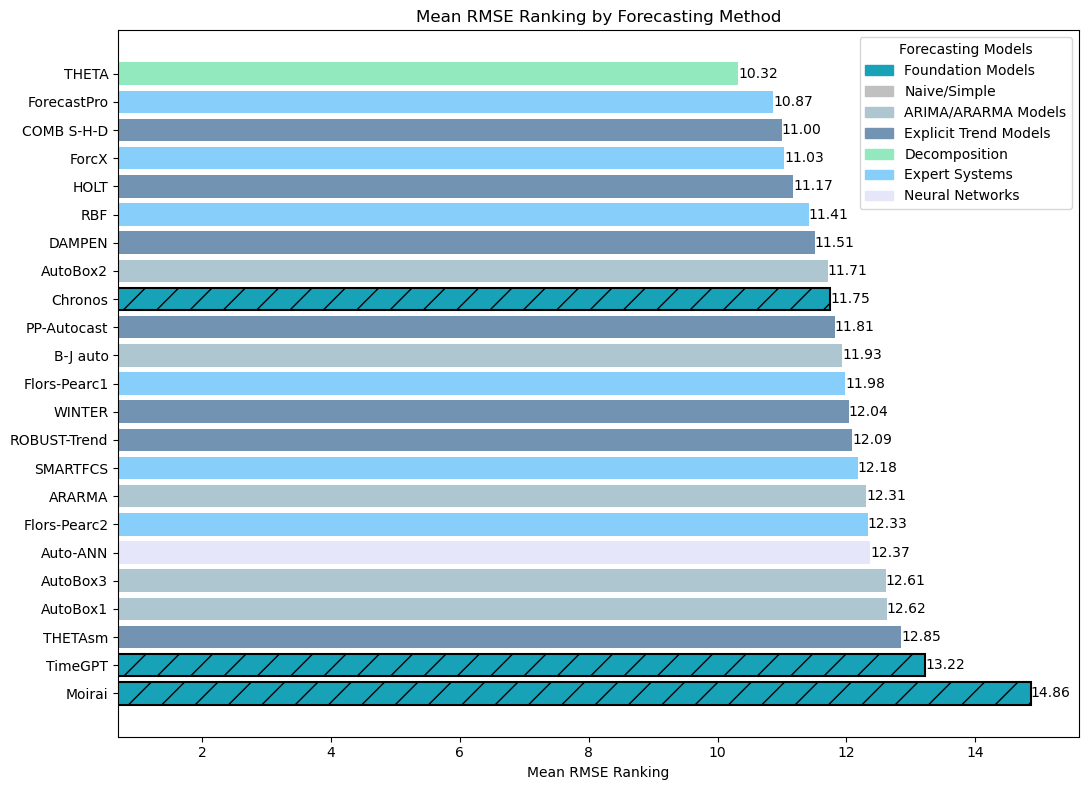

In [11]:
# Map the colors to the dataframe categories
category_colors = mean_rmse_rank_df['Category'].map(color_map)

# Create a bar chart with different colors for each category
plt.figure(figsize=(10, 8))
bars = plt.barh(mean_rmse_rank_df['Method'], mean_rmse_rank_df['MeanRmseRank'], color=category_colors)

# Highlight 'Foundation Models' bars
transformer_bars = [bar for bar, method in zip(bars, mean_rmse_rank_df['Method']) if mean_rmse_rank_df.loc[mean_rmse_rank_df['Method'] == method, 'Category'].values[0] == 'Foundation Models']
for bar in transformer_bars:
    bar.set_edgecolor('black')  # Adding a black border to the bar
    bar.set_linewidth(1.5)  # Making the border thicker
    bar.set_hatch('/')  # Adding a hatch pattern

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', ha='left')

plt.xlabel('Mean RMSE Ranking')
plt.title('Mean RMSE Ranking by Forecasting Method')
plt.gca().invert_yaxis()  # Invert y-axis to have the best method at the top
plt.legend(
    [plt.Rectangle((0,0),1,1, color=color_map[category]) for category in color_map],
    color_map.keys(),
    title="Forecasting Models",
    loc='best'  # Place the legend inside the plot in the lower right corner
)

#plt.grid(True, alpha=0.6)
plt.xlim(left=0.7)
plt.tight_layout(rect=[0,0,1.1,1])  # Adjust the rect to make space for the legend
plt.show()